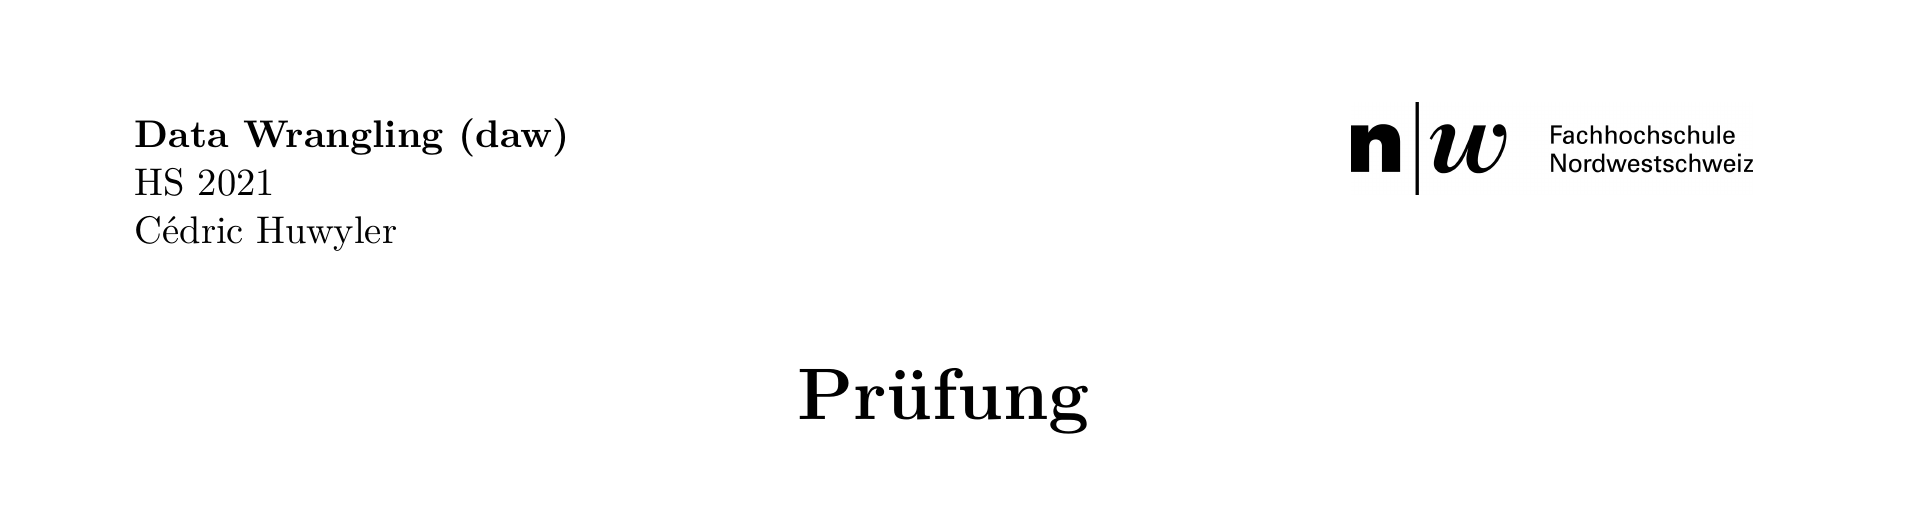

Libraries (kann falls nötig erweitert werden):

In [263]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Verwendete Versionen von Python, Pandas und Numpy:

In [264]:
sys.version

'3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]'

In [265]:
pd.__version__

'2.2.2'

In [266]:
np.__version__

'2.0.0'

# Aufgabe 1: Das Oldtimer-Datenset (49 Punkte)

Eine Firma die mit Oldtimern handelt möchte den An- und Verkauf von Autos optimieren und beschliesst sich, eine Data Science - Position auszuschreiben, für die Sie schliesslich eingestellt werden. Die Firma möchte mittelfristig ein System aufbauen, das den Wert von Oldtimern aufgrund verschiedener Parameter schätzen kann und so die durch den Ankauf und Verkauf von Fahrzeugen erzielten Gewinne optimiert. An Ihrem ersten Arbeitstag übergibt Ihnen Ihre Vorgesetzte ein Beispiel-Datenset mit Verkaufspreisen und weiteren Features, das der Informatiker für Sie zusammengestellt hat. Der Informatiker ist kein Data Scientist und schon länger im Dienst und hat entsprechend ein etwas 'altmodischeres' Format gewählt. Das Datenset kommt als Textdatei `cars.txt` daher und ist im Prüfungsmaterial zu finden.

### a) (6 Punkte) 

Sichten Sie die Datei mit einem Texteditor und lesen Sie sie dann in ein Data Frame ein. Machen Sie das ganze ohne manuelle Arbeit mit dem Texteditor, sondern versuchen Sie die Spaltennamen ebenfalls mit Pandas einzulesen.

**Hinweis:** Falls Sie es nicht schaffen, die Spaltennamen mit Pandas einzulesen, können Sie die Spaltennamen auch per Copy\&Paste setzen, mit entsprechendem Punkteverlust natürlich

In [267]:
cars = pd.read_csv("cars.txt", skiprows=30, header=None)

with open("cars.txt", encoding="utf-8") as f:
    header = f.readlines()[1:27]

header = [line.strip().replace("'", "").split(":")[0] for line in header]

#header = pd.read_csv("cars.txt", skiprows=1, nrows=26, delimiter=":", header=None)[0].values

cars.columns = header

cars

symboling normalized-losses         make fuel-type aspiration  \
0            3                 -  alfa-romero       gas        std   
1            3                 -  alfa-romero       gas        std   
2            1                 -  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0            130         mpfi  3.47    2.68               9.0        111   
1            130         mpfi  3.47    2.68               9.0        111   
2            152         mpfi  2.68    3.47               9.0        154   
3            109         mpfi  3.19    3.40              10.0        102   
4            136         mpfi  3.19    3.40               8.0        115   
..           ...          ...   ...     ...               ...        ...   
200          141         mpfi  3.78    3.15               9.5        114   
201          141         mpfi  3.78    3.15               8.7        160   
202          173         mpfi  3.58    2.87               8.8        134   
203          145          idi  3.01    3.40              23.0        106   
204          141         mpfi  3.78    3.15               9.5        114   

     peak-rpm city-mpg highway-mpg  price  
0        5000       21          27  13495  
1        5000       21          27  16500  
2        5000       19          26  16500  
3        5500       24          30  13950  
4        5500       18          22  17450  
..        ...      ...         ...    ...  
200      5400       23          28  16845  
201      5300       19          25  19045  
202      5500       18          23  21485  
203      4800       26          27  22470  
204      5400       19          25  22625  

[205 rows x 26 columns]

In [268]:
cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

### b) (13 Punkte)

Bereinigen Sie nun das Datenset. Stellen Sie dabei sicher, dass

   1. fehlende Werte mit `NaN` als solche markiert sind,
   2. jede Spalte den passenden Datentyp besitzt,
   3. der Schreibfehler 'alfa romero' zu 'alfa romeo' korrigiert ist,
   4. die Anzahl der Zylinder als Integer statt als String vorliegt,
   5. alle diskreten, nicht-numerischen Spalten als Kategorien definiert sind (je nach Skalierung mit oder ohne Ordnung).

In [269]:
def set_dtype_inplace(df:pd.DataFrame, column:str, dtype):
    df[column] = df[column].astype(dtype)

temp = cars.replace("-", np.nan)

temp["make"] = temp.make.replace("alfa-romero", "alfa-romeo")

temp["num-of-cylinders"] = temp["num-of-cylinders"].map({
    "four": 4,
    "six": 6,
    "five": 5,
    "three": 3,
    "twelve": 12,
    "two": 2,
    "eight": 8
})

# numerical
set_dtype_inplace(temp, "symboling", int)
set_dtype_inplace(temp, "normalized-losses", float)
set_dtype_inplace(temp, "length", float)
set_dtype_inplace(temp, "height", float)
set_dtype_inplace(temp, "curb-weight", int)
set_dtype_inplace(temp, "engine-size", int)
set_dtype_inplace(temp, "bore", float)
set_dtype_inplace(temp, "stroke", float)
set_dtype_inplace(temp, "compression-ratio", float)
set_dtype_inplace(temp, "horsepower", float)
set_dtype_inplace(temp, "peak-rpm", float)
set_dtype_inplace(temp, "city-mpg", int)
set_dtype_inplace(temp, "highway-mpg", int)
set_dtype_inplace(temp, "price", float)
set_dtype_inplace(temp, "num-of-cylinders", int)

# categorical
set_dtype_inplace(temp, "make", "category")
set_dtype_inplace(temp, "fuel-type", "category")
set_dtype_inplace(temp, "aspiration", "category")
set_dtype_inplace(temp, "num-of-doors", pd.CategoricalDtype(["two", "four"], ordered=True))
set_dtype_inplace(temp, "body-style", "category")
set_dtype_inplace(temp, "drive-wheels", "category")
set_dtype_inplace(temp, "engine-location", "category")
set_dtype_inplace(temp, "engine-type", "category")
set_dtype_inplace(temp, "fuel-system", "category")

cars = temp

In [270]:
cars.head()

symboling  normalized-losses        make fuel-type aspiration num-of-doors  \
0          3                NaN  alfa-romeo       gas        std          two   
1          3                NaN  alfa-romeo       gas        std          two   
2          1                NaN  alfa-romeo       gas        std          two   
3          2              164.0        audi       gas        std         four   
4          2              164.0        audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio  horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0       111.0    5000.0       21   
1         mpfi  3.47    2.68               9.0       111.0    5000.0       21   
2         mpfi  2.68    3.47               9.0       154.0    5000.0       19   
3         mpfi  3.19    3.40              10.0       102.0    5500.0       24   
4         mpfi  3.19    3.40               8.0       115.0    5500.0       18   

   highway-mpg    price  
0           27  13495.0  
1           27  16500.0  
2           26  16500.0  
3           30  13950.0  
4           22  17450.0  

[5 rows x 26 columns]

### c)  (2 Punkte)

Quantifizieren Sie die prozentuale Anzahl der fehlenden Werte mit einem Barplot. Welche Spalte enthält am meisten fehlende Werte?

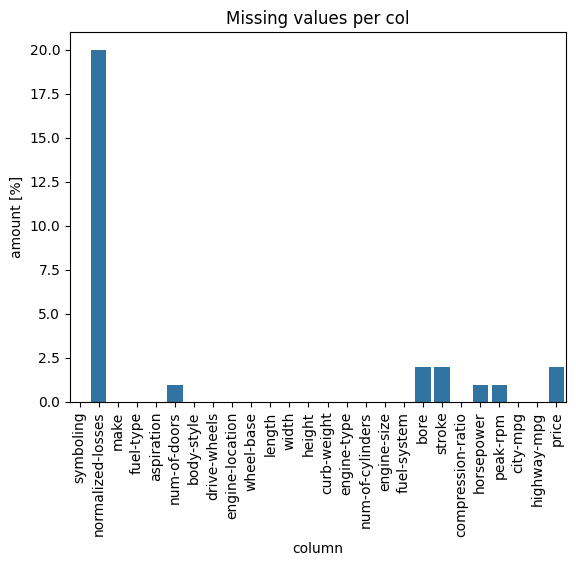

In [271]:
sns.barplot((cars.isna().mean() * 100).to_frame(name="amount [%]").reset_index(names="column"), x="column", y="amount [%]")
plt.xticks(rotation=90)
plt.title("Missing values per col")
plt.show()

Am meisten fehlende Werte besitzt die Spalte `normalized-losses` mit ca. 20%.

### d) (6 Punkte)

Sie verschaffen sich einen ersten Überblick über die Daten und haben sich dazu folgende drei Fragen überlegt, die Sie mit Box- oder Scatterplots grob (also ohne statistische Tests) beantworten möchten:

1. Hat der Wertverlust prozentual vom Kaufpreis einen Zusammenhang mit der Automarke?
2. Hat der Risikofaktor des Autos einen Zusammenhang mit dem Kaufpreis?
3. Hat die Anzahl der Zylinder einen Zusammenhang mit den Pferdestärken?

In [272]:
cars["wertverlust-prozentual"] = cars["normalized-losses"] / cars["price"]

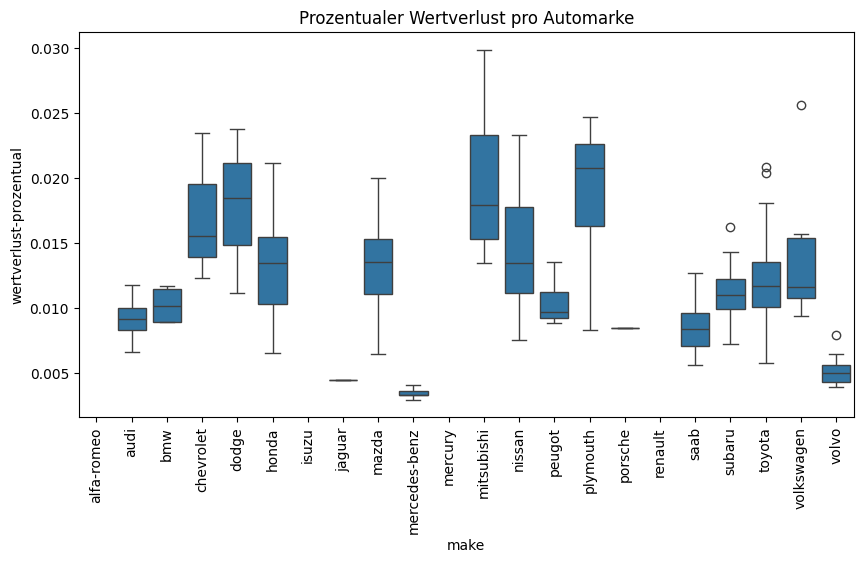

In [273]:
plt.figure(figsize=(10, 5))
sns.boxplot(cars, x="make", y="wertverlust-prozentual")
plt.xticks(rotation=90)
plt.title("Prozentualer Wertverlust pro Automarke")
plt.show()

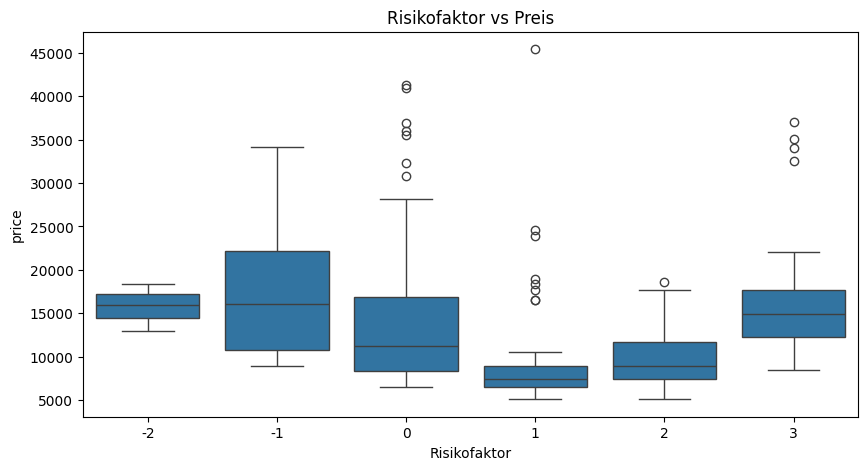

In [274]:
plt.figure(figsize=(10, 5))
sns.boxplot(cars, x="symboling", y="price")
plt.xlabel("Risikofaktor")
plt.title("Risikofaktor vs Preis")
plt.show()

In [275]:
cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'wertverlust-prozentual'],
      dtype='object')

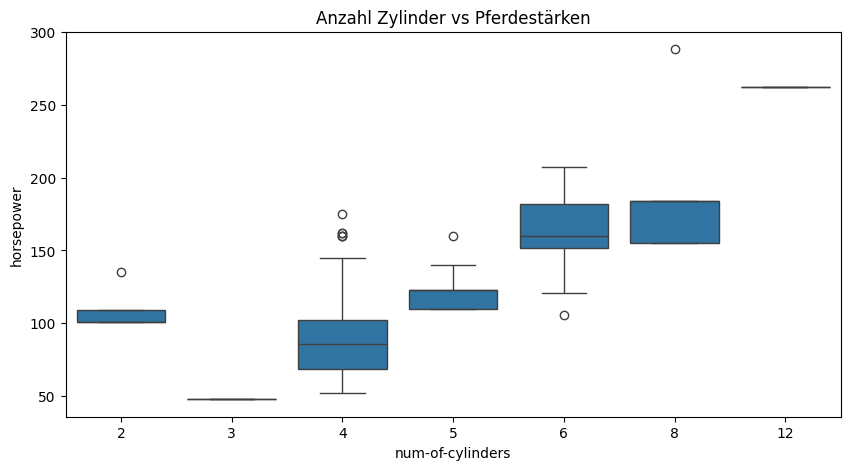

In [276]:
plt.figure(figsize=(10, 5))
sns.boxplot(cars, x="num-of-cylinders", y="horsepower")
plt.title("Anzahl Zylinder vs Pferdestärken")
plt.show()

### e) (6 Punkte)

Beantworten Sie ausserdem die folgenden Fragen mit entsprechenden Aggregationen:

1. Welches ist das teuerste Auto mit Risikofaktor `+3`?
2. Welche Automarke ist durchschnittlich am günstigsten?
3. Welche Automarke bietet das Cabriolet (`convertible`) mit am meisten PS an?

In [277]:
temp = cars.query("symboling == 3")
temp.iloc[[np.argmax(temp.price)]]

symboling  normalized-losses     make fuel-type aspiration num-of-doors  \
128          3                NaN  porsche       gas        std          two   

      body-style drive-wheels engine-location  wheel-base  ...  fuel-system  \
128  convertible          rwd            rear        89.5  ...         mpfi   

     bore  stroke  compression-ratio horsepower  peak-rpm  city-mpg  \
128  3.74     2.9                9.5      207.0    5900.0        17   

    highway-mpg    price  wertverlust-prozentual  
128          25  37028.0                     NaN  

[1 rows x 27 columns]

In [278]:
temp = cars.groupby("make").price.mean().to_frame().reset_index()
temp.iloc[[np.argmin(temp.price)]]

C:\Users\tobia\AppData\Local\Temp\ipykernel_27444\700901725.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = cars.groupby("make").price.mean().to_frame().reset_index()


make   price
3  chevrolet  6007.0

In [279]:
temp = cars.query("`body-style` == 'convertible'")
temp.iloc[np.argmax(temp.horsepower)].make

'porsche'

### f) (9 Punkte)

Der Preis (`price`) und der Wertverlust pro Jahr (`normalized-losses`) sind unentbehrliche Grössen zum Treffen einer Kaufentscheidung aufgrund des Typs und des Alters eines Autos. Leider fehlt ein beachtlicher Teil der Wertverluste. Für die Proof-of-Concept Studie verfolgen Sie zuerst einmal eine relativ einfache Imputationsstrategie, bevor Sie sich komplizierteren Strategien widmen:

Sie imputieren den Wertverlust mit dem Medianwert **pro Automarke** falls möglich, **sonst** mit dem insgesamten Medianwert vor der ersten Imputation, falls keine Wertverluste für eine Automarke verfügbar sind.

Implementieren Sie dafür eine Funktion `impute_medianloss( df )` die als Argument das Data Frame erhalten soll und die Spalte `normalized-losses` wo nötig mit imputierten Werten zurückgeben soll.

Die Funktion soll ausserdem die Anzahl der fehlenden Werte vor der ersten Imputation, nach der ersten Imputation und nach der zweiten Imputation per `print()` ausgeben. Der letzte Wert soll natürlich auf Null kommen.

In [280]:
def impute_medianloss(df:pd.DataFrame):
    total_median_loss = df["normalized-losses"].median()

    dfs = []
    for _, temp in df.groupby("make", observed=True):
        make_median = temp["normalized-losses"].median(skipna=True)

        if np.isnan(make_median):
            make_median = total_median_loss

        temp["normalized-losses"] = temp["normalized-losses"].fillna(make_median)

        dfs.append(temp)

    return pd.concat(dfs, ignore_index=True)

impute_medianloss(cars)

c:\Users\tobia\AppData\Local\pypoetry\Cache\virtualenvs\daw-frgUiEDf-py3.11\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\tobia\AppData\Local\pypoetry\Cache\virtualenvs\daw-frgUiEDf-py3.11\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\tobia\AppData\Local\pypoetry\Cache\virtualenvs\daw-frgUiEDf-py3.11\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\tobia\AppData\Local\pypoetry\Cache\virtualenvs\daw-frgUiEDf-py3.11\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


symboling  normalized-losses        make fuel-type aspiration  \
0            3              115.0  alfa-romeo       gas        std   
1            3              115.0  alfa-romeo       gas        std   
2            1              115.0  alfa-romeo       gas        std   
3            2              164.0        audi       gas        std   
4            2              164.0        audi       gas        std   
..         ...                ...         ...       ...        ...   
200         -1               95.0       volvo       gas        std   
201         -1               95.0       volvo       gas      turbo   
202         -1               95.0       volvo       gas        std   
203         -1               95.0       volvo    diesel      turbo   
204         -1               95.0       volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
200         four        sedan          rwd           front       109.1  ...   
201         four        sedan          rwd           front       109.1  ...   
202         four        sedan          rwd           front       109.1  ...   
203         four        sedan          rwd           front       109.1  ...   
204         four        sedan          rwd           front       109.1  ...   

     fuel-system  bore  stroke  compression-ratio horsepower  peak-rpm  \
0           mpfi  3.47    2.68                9.0      111.0    5000.0   
1           mpfi  3.47    2.68                9.0      111.0    5000.0   
2           mpfi  2.68    3.47                9.0      154.0    5000.0   
3           mpfi  3.19    3.40               10.0      102.0    5500.0   
4           mpfi  3.19    3.40                8.0      115.0    5500.0   
..           ...   ...     ...                ...        ...       ...   
200         mpfi  3.78    3.15                9.5      114.0    5400.0   
201         mpfi  3.78    3.15                8.7      160.0    5300.0   
202         mpfi  3.58    2.87                8.8      134.0    5500.0   
203          idi  3.01    3.40               23.0      106.0    4800.0   
204         mpfi  3.78    3.15                9.5      114.0    5400.0   

     city-mpg highway-mpg    price  wertverlust-prozentual  
0          21          27  13495.0                     NaN  
1          21          27  16500.0                     NaN  
2          19          26  16500.0                     NaN  
3          24          30  13950.0                0.011756  
4          18          22  17450.0                0.009398  
..        ...         ...      ...                     ...  
200        23          28  16845.0                0.005640  
201        19          25  19045.0                0.004988  
202        18          23  21485.0                0.004422  
203        26          27  22470.0                0.004228  
204        19          25  22625.0                0.004199  

[205 rows x 27 columns]

### g) (7 Punkte)

Um den Erfolg der gewählten Strategie zu evaluieren, haben Sie sich folgendes Setting überlegt: Sie erstellen zuerst eine geshuffelte Version des Data Frames (Zeilen zufällig neu sortiert), speichern dann die ersten 50 Werte von `normalized-losses` separat ab und setzen diese anschliessend auf `NaN`. Im Anschluss imputieren Sie mit der obigen Strategie und berechnen anschliessend die Wurzel des quadratisch aufsummierten Fehlers (RMSE) auf die tatsächlichen Werte:

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_i (\hat{x}_i - x_i)^2 }, 
$$
wobei $x_i$ den tatsächlichen Wert (den wir gespeichert haben) und $\hat{x}_i$ den imputierten Wert und $n$ die Anzahl der Werte bezeichne. Nehmen Sie Werte, die schon vorher gefehlt haben aus der Rechnung, da dort keine tatsächlichen Werte verfügbar sind. Beurteilen Sie die Qualität dieser Strategie, in welchem Prozentbereich der tatsächlichen Werte liegt das RMSE ungefähr?

**Hinweis:** 
* Vergessen Sie nicht, dass Slices aus Data Frames je nachdem Views bleiben, d.h. Veränderungen auf dem ursprünglichen Data Frame auch den Slice ändern. Machen Sie wo nötig eine Kopie des Objekts.
* Sie können die Evaluation auch mehrmals ausführen für verschiedene Shufflings, so erhalten Sie ein besseres Bild der Qualität und sind weniger vom Zufall abhängig.

c:\Users\tobia\AppData\Local\pypoetry\Cache\virtualenvs\daw-frgUiEDf-py3.11\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\tobia\AppData\Local\pypoetry\Cache\virtualenvs\daw-frgUiEDf-py3.11\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\tobia\AppData\Local\pypoetry\Cache\virtualenvs\daw-frgUiEDf-py3.11\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\tobia\AppData\Local\pypoetry\Cache\virtualenvs\daw-frgUiEDf-py3.11\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\tobia\AppData\Local\pypoetry\Cache\virtualenvs\daw-frgUiEDf-py3.11\Lib\site-packages\numpy\

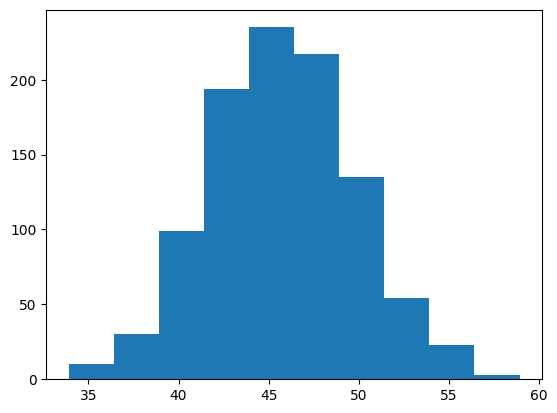

In [344]:
errors = []
for i in range(1000):

    temp = cars.dropna(subset=["normalized-losses"]).copy()
    temp = temp.sample(frac=1)

    selected_values = temp["normalized-losses"][:50].copy()

    temp.loc[selected_values.index, "normalized-losses"] = np.nan

    y = selected_values.values

    temp_inputed = impute_medianloss(temp)

    y_ = temp_inputed["normalized-losses"].values[:50]

    errors.append(np.sqrt(np.mean((y_ - y)**2)))

plt.hist(errors)
plt.show()

# Aufgabe 2: Sterberaten und Covid-19 (23 Punkte)

Zu Beginn von Covid-19 wurde diskutiert, dass vielleicht einfach die 'Alten und Schwachen' mit dem Virus etwas früher wegsterben, die Sterblichkeit dadurch zwischenzeitlich etwas höher werde aber dafür im Nachhinein unter die Erwartung sinken könnte. Als Data Scientist möchten Sie diese Diskussion kurz mit Zahlen untermauern und zeigen, dass dies mindestens auf den ersten Blick nicht so erscheint.

### a) (2 Punkte)

In der beiliegenden Excel-Datei `Sterblichkeit.xlsx` finden Sie die entsprechenden Zahlen zur Sterblichkeit des [Bundesamts für Statistik](https://www.bfs.admin.ch/bfs/de/home/statistiken/gesundheit/gesundheitszustand/sterblichkeit-todesursachen.assetdetail.21404882.html). Lesen Sie die Datei in ein Data Frame ein.

In [360]:
sterbli = pd.read_excel("Sterblichkeit.xlsx", sheet_name="Daten", na_values=["           ."], parse_dates=["endend"], date_format="%d.%m.%Y")

sterbli = sterbli.rename(columns=lambda x: x.strip())

display(sterbli)

Jahr  Woche     endend     Alter  AnzTF_HR  Erwartung  untGrenze  \
0    2020      1 2020-01-05  0-64         149.0        173        139   
1    2020      2 2020-01-12  0-64         166.0        172        138   
2    2020      3 2020-01-19  0-64         186.0        172        138   
3    2020      4 2020-01-26  0-64         177.0        172        138   
4    2020      5 2020-02-02  0-64         163.0        171        137   
..    ...    ...        ...       ...       ...        ...        ...   
309  2022     48 2022-12-04  65+            NaN       1141       1054   
310  2022     49 2022-12-11  65+            NaN       1151       1065   
311  2022     50 2022-12-18  65+            NaN       1160       1073   
312  2022     51 2022-12-25  65+            NaN       1171       1083   
313  2022     52 2023-01-01  65+            NaN       1184       1096   

     obeGrenze  
0          207  
1          206  
2          206  
3          205  
4          205  
..         ...  
309       1228  
310       1239  
311       1249  
312       1260  
313       1274  

[314 rows x 8 columns]

### b) (9 Punkte)

Bringen Sie alle Spalten in ein passendes Format. Insbesondere:

* Ganze Zahlen sollen wenn möglich als Integer vorliegen (sonst als Float).
* Das Datum `endend` soll im Datumsformat vorliegen.
* Alle Zeichenketten sollen am Anfang und Ende keine Leerzeichen vorweisen.
* Fehlende Werte sollen entsprechend mit `NaN` gekennzeichnet werden.

In [361]:
sterbli.dtypes

Jahr                  int64
Woche                 int64
endend       datetime64[ns]
Alter                object
AnzTF_HR            float64
Erwartung             int64
untGrenze             int64
obeGrenze             int64
dtype: object

### c) (4 Punkte)

Stellen Sie die tatsächliche Anzahl der Todesfälle pro Woche, die erwartete Anzahl und deren untere und obere statistische Grenze in jeweils einem separaten Plot pro Altersklasse dar.

In [374]:
sterbli_wide = sterbli.pivot_table(index=["Jahr", "Woche", "endend"], columns="Alter", values=["Erwartung", "untGrenze", "obeGrenze"]).reset_index()
sterbli_wide

Jahr Woche     endend Erwartung          obeGrenze          untGrenze  \
Alter                         0-64     65+       0-64     65+       0-64       
0      2020     1 2020-01-05     173.0   1252.0     207.0   1343.0     139.0   
1      2020     2 2020-01-12     172.0   1257.0     206.0   1348.0     138.0   
2      2020     3 2020-01-19     172.0   1262.0     206.0   1354.0     138.0   
3      2020     4 2020-01-26     172.0   1267.0     205.0   1359.0     138.0   
4      2020     5 2020-02-02     171.0   1272.0     205.0   1364.0     137.0   
..      ...   ...        ...       ...      ...       ...      ...       ...   
152    2022    48 2022-12-04     171.0   1141.0     205.0   1228.0     138.0   
153    2022    49 2022-12-11     171.0   1151.0     206.0   1239.0     139.0   
154    2022    50 2022-12-18     172.0   1160.0     207.0   1249.0     139.0   
155    2022    51 2022-12-25     173.0   1171.0     208.0   1260.0     140.0   
156    2022    52 2023-01-01     174.0   1184.0     209.0   1274.0     141.0   

                
Alter 65+       
0       1161.0  
1       1166.0  
2       1171.0  
3       1176.0  
4       1180.0  
..         ...  
152     1054.0  
153     1065.0  
154     1073.0  
155     1083.0  
156     1096.0  

[157 rows x 9 columns]

### d) (4 Punkte)

Berechnen Sie nun für jede Woche die Differenz der registrierten Todesfälle zum erwarteten Wert und visualisieren Sie diese Differenz für die über-65-Jährigen pro Woche. Rechnen Sie die überdurchschnittlichen Todesfälle (Übersterblichkeit, alle Werte über der Nulllinie) und die 'eingesparten' Todesfälle (Untersterblichkeit, alle Werte unter der Nulllinie) über die ganze erfasste Zeit zusammen und vergleichen Sie.

In [ ]:
# IHR CODE

### e) (4 Punkte)

Berechnen Sie nun, wieviele Personen absolut und in Prozent in den Jahren 2020 und 2021 mehr gestorben sind als sonst. Hat sich der 'Covid19-Effekt' wieder aufgehoben und sind insgesamt etwa gleich viele Personen gestorben?

Erstellen Sie eine Tabelle der folgenden Struktur:

<div><img src="attachment:image.png" width="500"></div>

In [ ]:
# IHR CODE